In [1]:
import rasterio
import numpy as np
import matplotlib as mpl

## Combine band -> NDVI 

In [64]:
datasetName = 'LC08_L1TP_127051_20180114_20180120_01_T1'
listFile = ['Data/' + datasetName + '/' + datasetName + '_B5.TIF',
           'Data/' + datasetName + '/' + datasetName + '_B4.TIF',
           'Data/' + datasetName + '/' + datasetName + '_B3.TIF']
with rasterio.open(listFile[0]) as src:
    meta = src.meta

meta.update(count = len(listFile))

with rasterio.open('NDVI_Combined/201801_1.TIF','w', **meta) as des:
    for id, layer in enumerate(listFile):
        with rasterio.open(layer) as src:
            des.write_band(id + 1, src.read(1))

/home/ahldt/.local/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


## Merge GeoTIFF Data

In [92]:
from rasterio.merge import merge

monthYearLabel = '201801'
datasets = ['NDVI_Combined/' + monthYearLabel + '_1.TIF',
           'NDVI_Combined/' + monthYearLabel + '_2.TIF']

listFile = [rasterio.open(f) for f in datasets]

dest, output_transform = merge(listFile)

profile = listFile[0].profile
profile['transform'] = output_transform
profile['height'] = dest.shape[1]
profile['width'] = dest.shape[2]
# profile['driver'] = drive

# profile.update(**creation_options)

with rasterio.open('NDVI/' + monthYearLabel + '.TIF', 'w', **profile) as dst:
    dst.write(dest)
    
    try:
        colormap = listFile[0].colormap(1)
        dst.write_colormap(1, colormap)
    except ValueError:
        pass

## Calculate NDVI

/home/ahldt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/ahldt/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


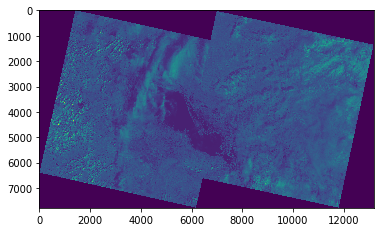

In [36]:
import subprocess
from matplotlib import pyplot

geoTiffData = rasterio.open('NDVI/201612.TIF')

bands = geoTiffData.read()

ndvi = np.zeros(red.shape, dtype=rasterio.float32)
    # print(nir)
ndvi = (nir.astype(float)-red.astype(float))/(nir+red).astype(float)
# kwargs = geoTiffData.meta
# kwargs.update(
#     dtype=rasterio.float32,
#     count=1)

# with rasterio.open('example-total.tif', 'w', **kwargs) as dst:
#     dst.write_band(1, ndvi.astype(rasterio.float32))


In [78]:
from rasterio.tools.mask import mask
from rasterio.merge import merge

bands = geoTiffData.read()
dest, output_transform = merge(bands[:-1])

profile = bands[0].profile
profile['transform'] = output_transform
profile['height'] = dest.shape[1]
profile['width'] = dest.shape[2]

pyplot.imshow(dest)

AttributeError: 'numpy.ndarray' object has no attribute 'res'